In [1]:
from data.read import load_data
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:

cwd = Path.cwd()
datadir = cwd.joinpath("data")


def get_df(data_dir, num_files: int):
    files = os.listdir(data_dir)
    path_csvs = [filename for filename in files if filename[-4:] == ".csv"]

    df_list = [pd.read_csv(data_dir.joinpath(f_name)) for i, f_name in enumerate(path_csvs) if i < num_files]

    return pd.concat(df_list, ignore_index=True)



df = get_df(datadir, 1)

def convert_side_to_num(df):
    map_dct= {"sell": -1, "buy": 1}

    df["side"] = df["side"].apply(lambda x: map_dct[x])

    return df


df = convert_side_to_num(df)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
df.set_index('timestamp', inplace=True)

In [3]:
df

,exchange,symbol,local_timestamp,id,side,price,amount
timestamp,,,,,,,
2024-10-26 00:00:00.097000+00:00,bybit,BTCUSDT,1729900800102000,9da81335-6be3-5981-9840-fd1bb0634560,-1,66666.8,0.009
2024-10-26 00:00:00.097000+00:00,bybit,BTCUSDT,1729900800102000,2c7a4f4d-fe5f-585a-aef2-747e3ef68448,-1,66666.8,0.027
2024-10-26 00:00:00.129000+00:00,bybit,BTCUSDT,1729900800134000,0a9164db-aa5c-55e9-949b-6fa9e21ac122,-1,66666.8,0.004
2024-10-26 00:00:00.239000+00:00,bybit,BTCUSDT,1729900800243000,539a2af3-7dbb-5b0b-8c10-9f51059cd3b7,-1,66666.8,0.002
2024-10-26 00:00:00.279000+00:00,bybit,BTCUSDT,1729900800283000,8e2da7ed-4cf5-5a6c-acdd-24e7828284a5,-1,66666.8,0.004
...,...,...,...,...,...,...,...
2024-10-26 23:59:50.918000+00:00,bybit,BTCUSDT,1729987190922000,0e1036fe-1d0d-5980-8d7d-0eb4a71ae9aa,-1,67069.1,0.471
2024-10-26 23:59:51.834000+00:00,bybit,BTCUSDT,1729987191838000,8d5f091e-9926-5870-b0d4-83dfb4e023df,-1,67069.1,0.024
2024-10-26 23:59:52.918000+00:00,bybit,BTCUSDT,1729987192922000,1e6a585a-af10-5f29-890a-77e97bce13ea,-1,67069.1,0.004


In [4]:
df.groupby("timestamp").size()


timestamp
2024-10-26 00:00:00.097000+00:00    2
2024-10-26 00:00:00.129000+00:00    1
2024-10-26 00:00:00.239000+00:00    1
2024-10-26 00:00:00.279000+00:00    1
2024-10-26 00:00:00.336000+00:00    1
                                   ..
2024-10-26 23:59:50.918000+00:00    2
2024-10-26 23:59:51.834000+00:00    1
2024-10-26 23:59:52.918000+00:00    1
2024-10-26 23:59:55.135000+00:00    1
2024-10-26 23:59:56.642000+00:00    1
Length: 220655, dtype: int64

In [5]:
def get_df_by_day(df, day: str):
    return df[df.index.date == pd.to_datetime(day).date()]

In [6]:

df_per_min = df.copy()
df_per_min['minute'] = df_per_min.index.floor('min')
(df_per_min.head())


,exchange,symbol,local_timestamp,id,side,price,amount,minute
timestamp,,,,,,,,
2024-10-26 00:00:00.097000+00:00,bybit,BTCUSDT,1729900800102000,9da81335-6be3-5981-9840-fd1bb0634560,-1,66666.8,0.009,2024-10-26 00:00:00+00:00
2024-10-26 00:00:00.097000+00:00,bybit,BTCUSDT,1729900800102000,2c7a4f4d-fe5f-585a-aef2-747e3ef68448,-1,66666.8,0.027,2024-10-26 00:00:00+00:00
2024-10-26 00:00:00.129000+00:00,bybit,BTCUSDT,1729900800134000,0a9164db-aa5c-55e9-949b-6fa9e21ac122,-1,66666.8,0.004,2024-10-26 00:00:00+00:00
2024-10-26 00:00:00.239000+00:00,bybit,BTCUSDT,1729900800243000,539a2af3-7dbb-5b0b-8c10-9f51059cd3b7,-1,66666.8,0.002,2024-10-26 00:00:00+00:00
2024-10-26 00:00:00.279000+00:00,bybit,BTCUSDT,1729900800283000,8e2da7ed-4cf5-5a6c-acdd-24e7828284a5,-1,66666.8,0.004,2024-10-26 00:00:00+00:00


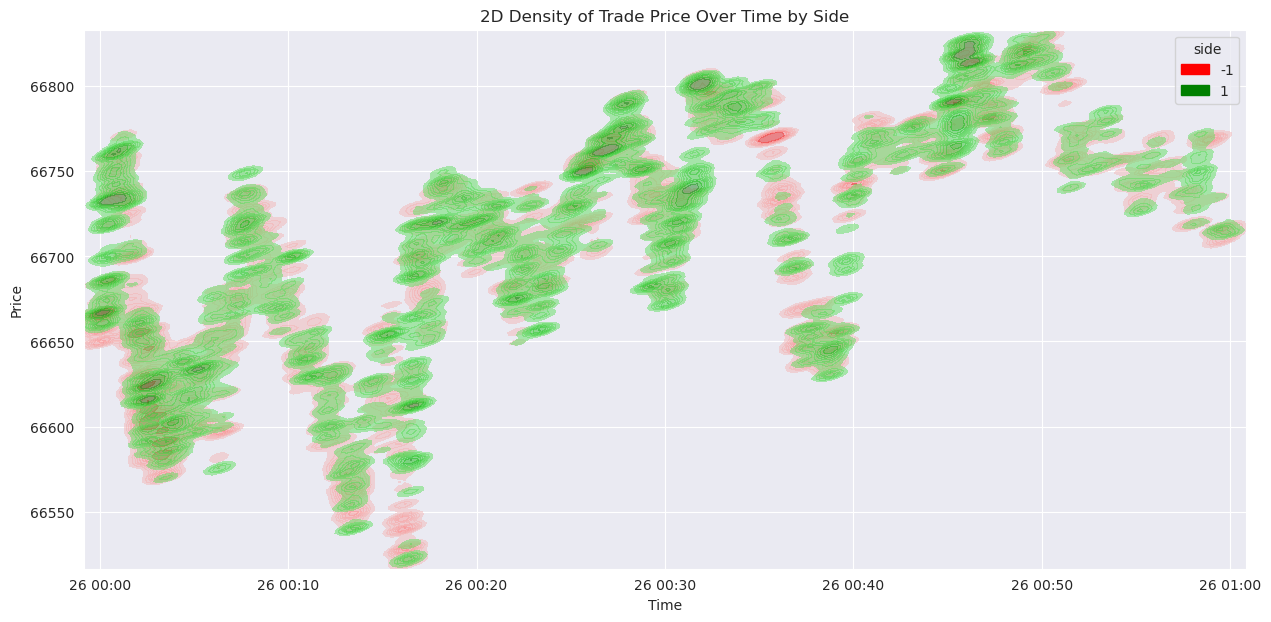

In [7]:



def plot_2d_density_of_trade_price_over_time(df, start_time):
    """
    Plots a 2D density plot of trade prices over time for a given start time,
    separated by trade side.
    """
    end_time = start_time + pd.Timedelta(hours=1)
    df_subset = df[(df.index >= start_time) & (df.index < end_time)]

    # Create the 2D density plot
    plt.figure(figsize=(15, 7))
    sns.kdeplot(
        data=df_subset,
        x=df_subset.index,
        y='price',
        fill=True,
        weights='amount',
        hue='side',
        palette={-1: "red", 1: "green"}, # -1 for sell, 1 for buy
        alpha=0.5,
        common_norm=False,  # Normalize each side separately
        bw_adjust=0.1  # Adjust bandwidth for smoother density

    )

    plt.title('2D Density of Trade Price Over Time by Side')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

plot_2d_density_of_trade_price_over_time(df_per_min, pd.Timestamp('2024-10-26 00:00:00+00:00'))

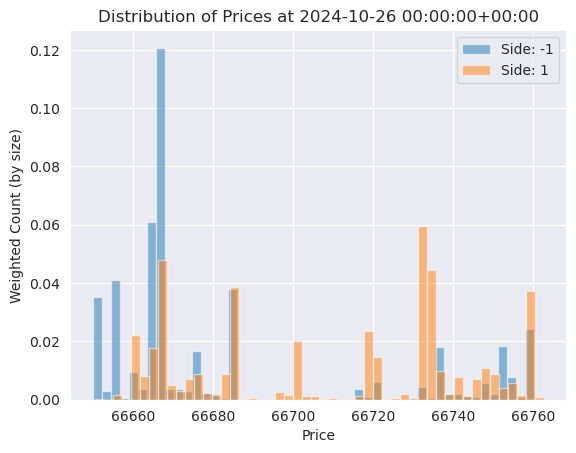

In [8]:


chosen_minute = pd.Timestamp('2024-10-26 00:00:00+00:00')

def plot_distribution_of_prices_at_minute(df, minute):
    trades_at_minute = df[df['minute'] == minute]
    for side in trades_at_minute['side'].unique():
        trades = trades_at_minute[trades_at_minute['side'] == side]
        plt.hist(
            trades['price'],
            bins=50,
            alpha=0.5,
            label=f'Side: {side}',
            weights=trades['amount'],
            density=True
        )
    plt.legend()
    plt.title(f'Distribution of Prices at {minute}')
    plt.xlabel('Price')
    plt.ylabel('Weighted Count (by size)')
    plt.show()

plot_distribution_of_prices_at_minute(df_per_min, chosen_minute)

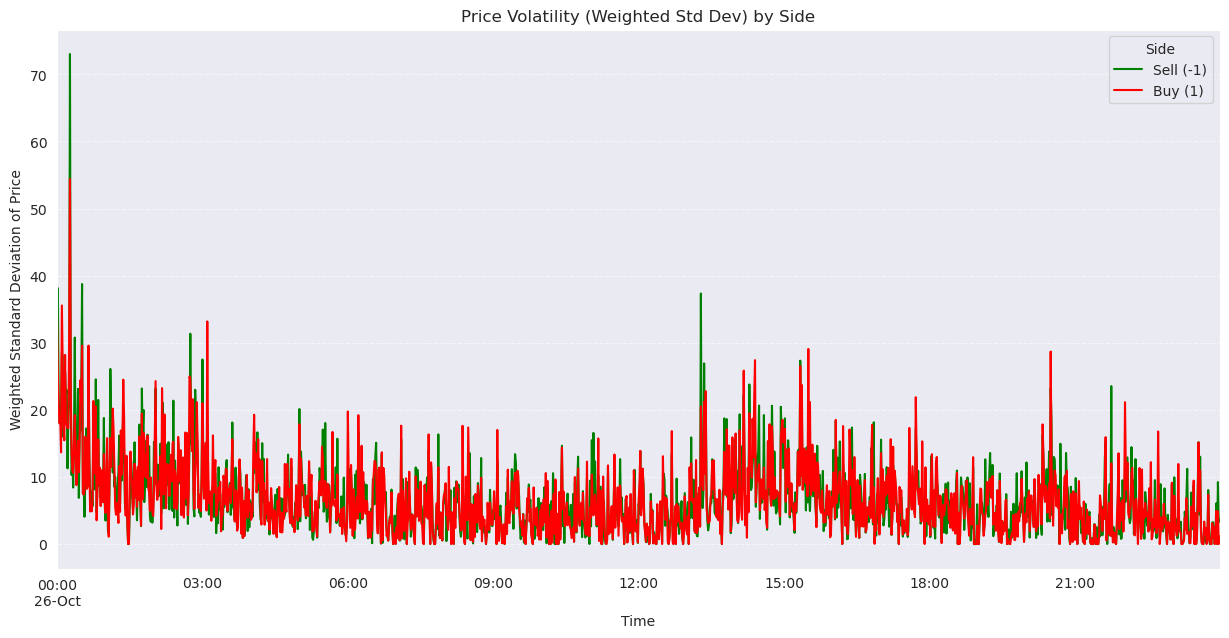

In [9]:

def weighted_std(values, weights):
    """Calculates the weighted standard deviation."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    return np.sqrt(variance)

# Group by minute and side, then calculate volatility
volatility_by_side = df_per_min.groupby(['minute', 'side']).apply(
    lambda g: weighted_std(g['price'], g['amount']),
    include_groups=False,
).unstack() # Use unstack() to create separate columns for each side

# Plot the results
plt.figure(figsize=(15, 7))
volatility_by_side.plot(ax=plt.gca(), color={"red", "green"})
plt.title('Price Volatility (Weighted Std Dev) by Side')
plt.xlabel('Time')
plt.ylabel('Weighted Standard Deviation of Price')
plt.legend(title='Side', labels=['Sell (-1)', 'Buy (1)'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

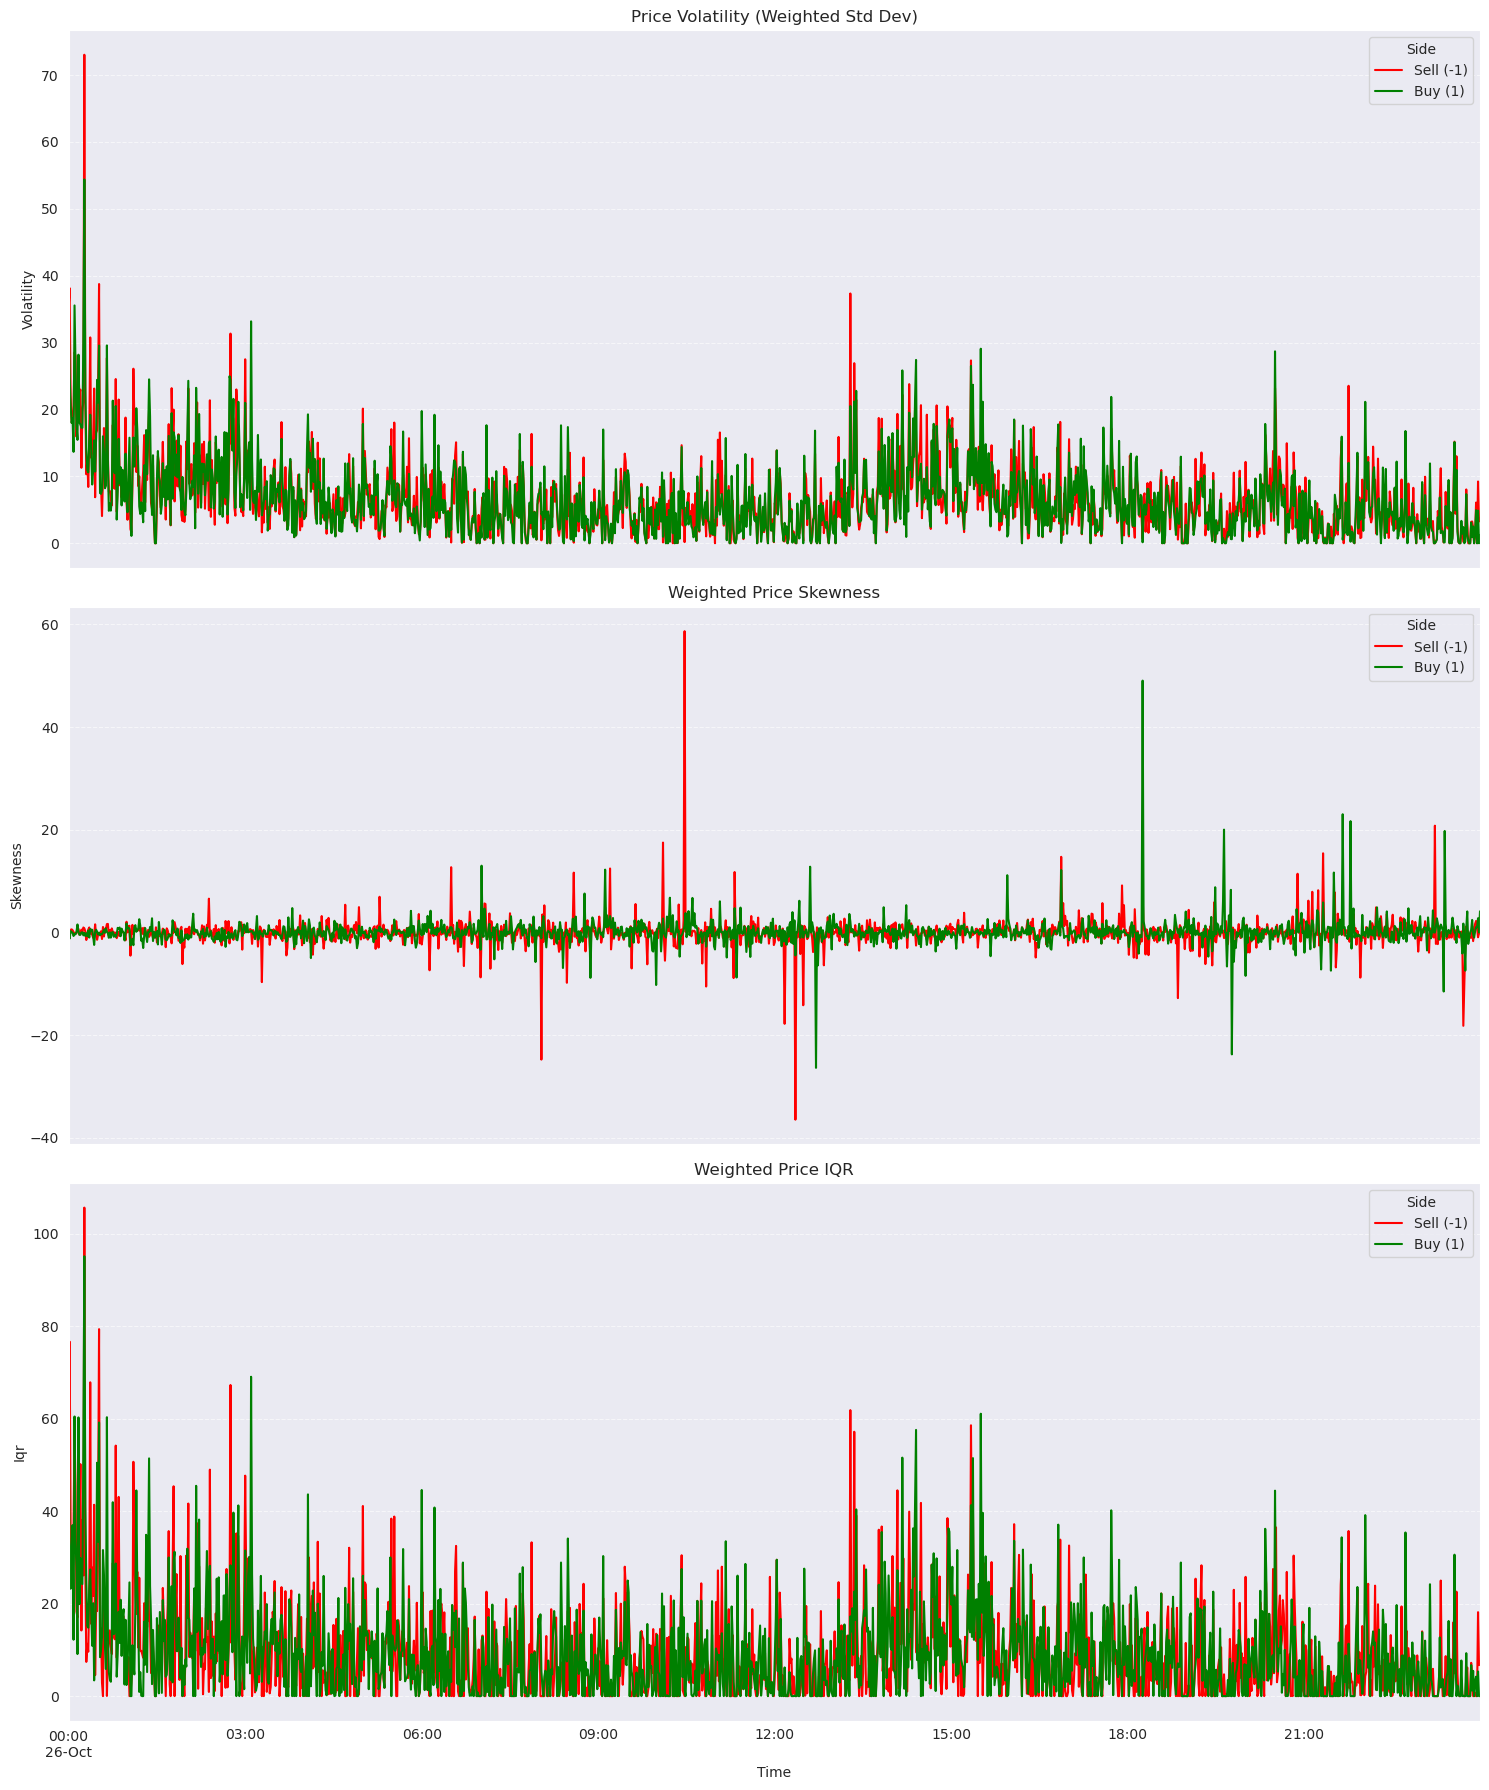

In [10]:


def weighted_std(values, weights):
    """Calculates the weighted standard deviation."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    return np.sqrt(variance)

def weighted_skew(values, weights):
    """Calculates the weighted skewness."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    std_dev = np.sqrt(variance)
    if std_dev == 0:
        return 0
    return np.average(((values - average) / std_dev)**3, weights=weights)

def weighted_quantile(values, quantiles, weights):
    """Calculates weighted quantiles."""
    sorter = np.argsort(values)
    values = np.array(values)[sorter]
    weights = np.array(weights)[sorter]
    weighted_quantiles = np.cumsum(weights) - 0.5 * weights
    weighted_quantiles /= np.sum(weights)
    return np.interp(quantiles, weighted_quantiles, values)

def weighted_iqr(values, weights):
    """Calculates the weighted Interquartile Range (IQR)."""
    q1 = weighted_quantile(values, 0.25, weights=weights)
    q3 = weighted_quantile(values, 0.75, weights=weights)
    return q3 - q1

def calculate_price_stats(g):
    """Calculates weighted volatility, skewness, and IQR for a group."""
    weights = g['amount']
    prices = g['price']
    return pd.Series({
        'volatility': weighted_std(prices, weights),
        'skewness': weighted_skew(prices, weights),
        'iqr': weighted_iqr(prices, weights)
    })

# Group by minute and side, then calculate all metrics
price_stats = df_per_min.groupby(['minute', 'side']).apply(
    calculate_price_stats,
    include_groups=False
).unstack()

# Plot the results on separate subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
metrics_to_plot = ['volatility', 'skewness', 'iqr']
titles = ['Price Volatility (Weighted Std Dev)', 'Weighted Price Skewness', 'Weighted Price IQR']
colors = {-1: "red", 1: "green"}

for i, metric in enumerate(metrics_to_plot):
    price_stats[metric].plot(ax=axes[i], color=colors)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(metric.capitalize())
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(title='Side', labels=['Sell (-1)', 'Buy (1)'])

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

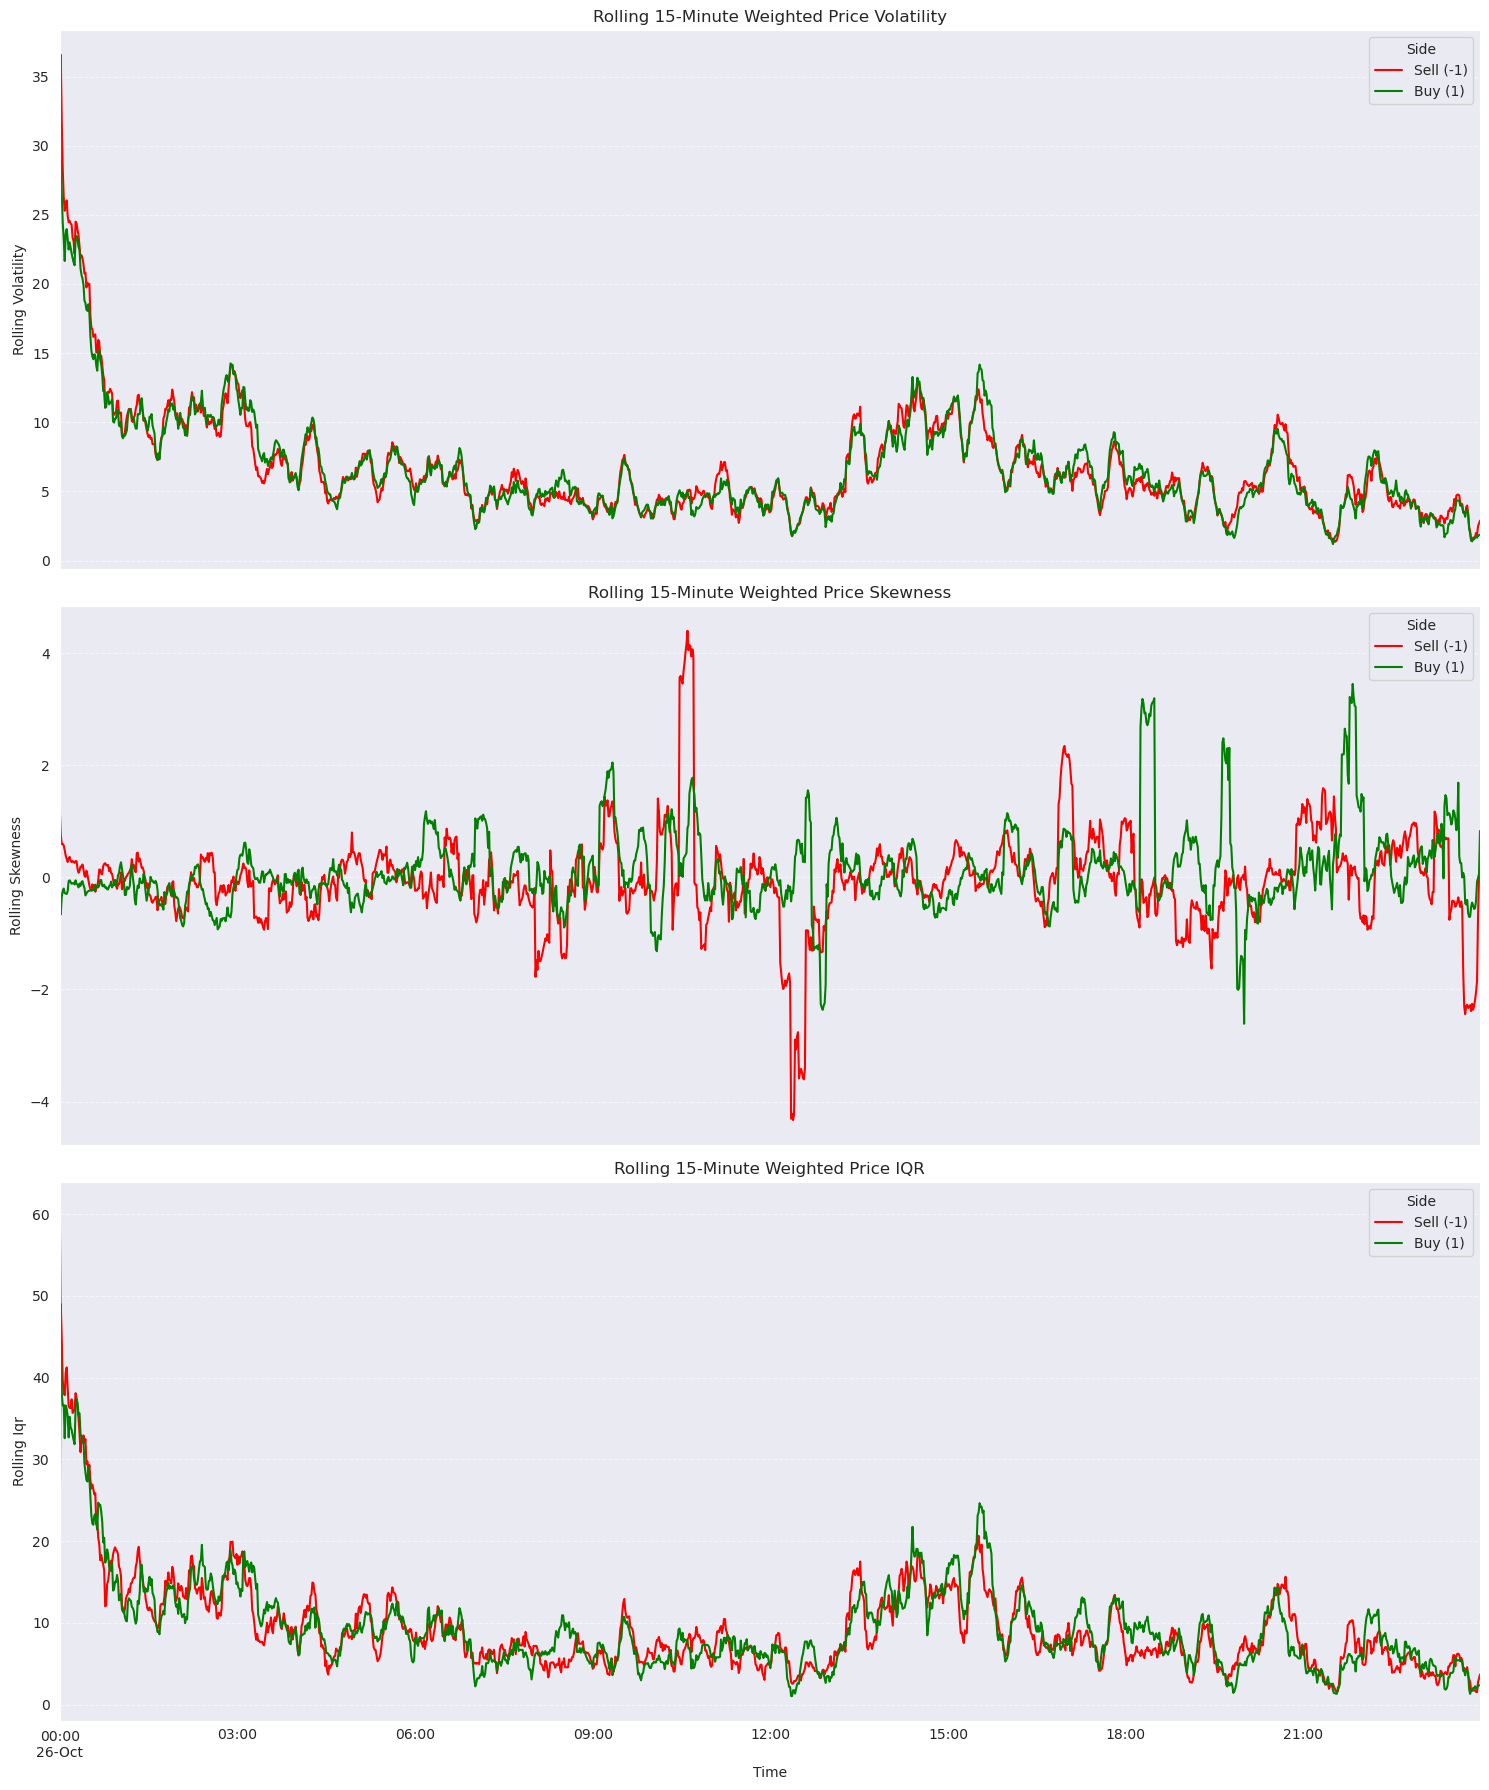

In [11]:

def weighted_std(values, weights):
    """Calculates the weighted standard deviation."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    return np.sqrt(variance)

def weighted_skew(values, weights):
    """Calculates the weighted skewness."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    std_dev = np.sqrt(variance)
    if std_dev == 0:
        return 0
    return np.average(((values - average) / std_dev)**3, weights=weights)

def weighted_quantile(values, quantiles, weights):
    """Calculates weighted quantiles."""
    sorter = np.argsort(values)
    values = np.array(values)[sorter]
    weights = np.array(weights)[sorter]
    weighted_quantiles = np.cumsum(weights) - 0.5 * weights
    weighted_quantiles /= np.sum(weights)
    return np.interp(quantiles, weighted_quantiles, values)

def weighted_iqr(values, weights):
    """Calculates the weighted Interquartile Range (IQR)."""
    q1 = weighted_quantile(values, 0.25, weights=weights)
    q3 = weighted_quantile(values, 0.75, weights=weights)
    return q3 - q1

def calculate_price_stats(g):
    """Calculates weighted volatility, skewness, and IQR for a group."""
    weights = g['amount']
    prices = g['price']
    return pd.Series({
        'volatility': weighted_std(prices, weights),
        'skewness': weighted_skew(prices, weights),
        'iqr': weighted_iqr(prices, weights)
    })

# Group by minute and side, then calculate all metrics
price_stats = df_per_min.groupby(['minute', 'side']).apply(
    calculate_price_stats,
    include_groups=False
).unstack()

# Define the rolling window size
window_size = 15 # 15 minutes

# Calculate the rolling average of each statistic to get a smoothed view
rolling_stats = price_stats.rolling(window=window_size, min_periods=1).mean()

# Plot the results on separate subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
metrics_to_plot = ['volatility', 'skewness', 'iqr']
titles = [
    f'Rolling {window_size}-Minute Weighted Price Volatility',
    f'Rolling {window_size}-Minute Weighted Price Skewness',
    f'Rolling {window_size}-Minute Weighted Price IQR'
]
colors = {-1: "red", 1: "green"}

for i, metric in enumerate(metrics_to_plot):
    rolling_stats[metric].plot(ax=axes[i], color=colors)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(f'Rolling {metric.capitalize()}')
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(title='Side', labels=['Sell (-1)', 'Buy (1)'])

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

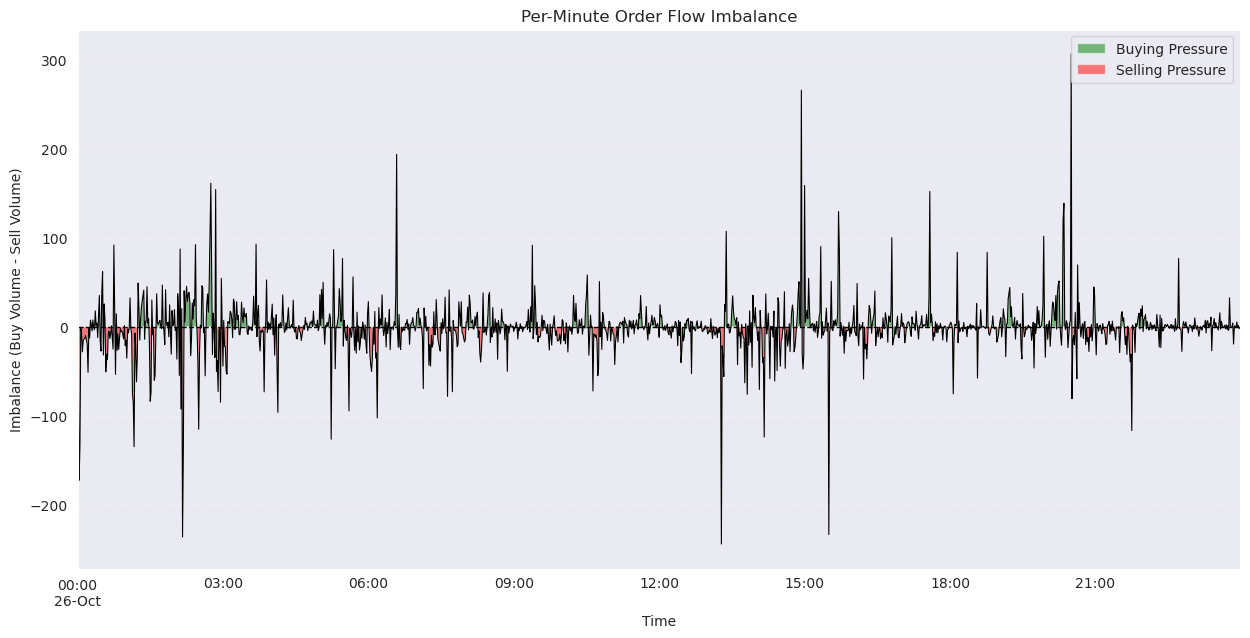

In [12]:
# Calculate the total volume for each side within each minute.
# The .unstack() method pivots the 'side' index level into columns.
volume_by_side = df_per_min.groupby(['minute', 'side'])['amount'].sum().unstack(fill_value=0)

# Calculate Order Flow Imbalance (Buy Volume - Sell Volume)
# In your data, buy side is 1 and sell side is -1.
volume_by_side['imbalance'] = volume_by_side[1] - volume_by_side[-1]

# --- Plotting the Order Flow Imbalance ---
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the imbalance as a thin line
volume_by_side['imbalance'].plot(ax=ax, color='black', linewidth=0.8, label='_nolegend_')

# Use fill_between to visually distinguish buying vs. selling pressure
ax.fill_between(
    volume_by_side.index, 0, volume_by_side['imbalance'],
    where=volume_by_side['imbalance'] > 0,
    facecolor='green', alpha=0.5, interpolate=True, label='Buying Pressure'
)
ax.fill_between(
    volume_by_side.index, 0, volume_by_side['imbalance'],
    where=volume_by_side['imbalance'] <= 0,
    facecolor='red', alpha=0.5, interpolate=True, label='Selling Pressure'
)

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_title('Per-Minute Order Flow Imbalance')
ax.set_xlabel('Time')
ax.set_ylabel('Imbalance (Buy Volume - Sell Volume)')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [13]:
# # --- Base Per-Minute Aggregations ---
#
# def weighted_std(values, weights):
#     """Calculates the weighted standard deviation."""
#     average = np.average(values, weights=weights)
#     variance = np.average((values - average)**2, weights=weights)
#     return np.sqrt(variance)
#
# def calculate_volatility(g):
#     """Calculates weighted volatility for a group."""
#     if g.empty or g['amount'].sum() == 0:
#         return 0
#     return weighted_std(g['price'], g['amount'])
# # Create a clean per-minute feature DataFrame.
# df_minute_index = df_per_min['minute'].unique()
# features = pd.DataFrame(index=df_minute_index).sort_index()
# window_size = 15  # Use a 15-minute rolling window
#
# # --- 1. Volume Features ---
# volume_stats = df_per_min.groupby('minute').agg(
#     volume_total=('amount', 'sum')
# )
# volume_by_side = df_per_min.groupby(['minute', 'side'])['amount'].sum().unstack(fill_value=0)
# volume_stats['volume_buy'] = volume_by_side.get(1, 0)
# volume_stats['volume_sell'] = volume_by_side.get(-1, 0)
# features = features.join(volume_stats)
#
# # --- 2. Price Features ---
# # Calculate VWAP (Volume Weighted Average Price) and OHLC per minute
# vwap = (df_per_min['price'] * df_per_min['amount']).groupby(df_per_min['minute']).sum() / features['volume_total']
# ohlc = df_per_min.groupby('minute')['price'].ohlc()
# features['price_vwap'] = vwap
# features['price_range'] = ohlc['high'] - ohlc['low']
#
# # Rolling price features
# features['price_rolling_mean'] = features['price_vwap'].rolling(window=window_size, min_periods=1).mean()
# features['price_rolling_std'] = features['price_vwap'].rolling(window=window_size, min_periods=1).std()
# features['price_momentum'] = features['price_vwap'] - features['price_rolling_mean']
#
# # --- 3. Order Flow Features ---
# features['ofi'] = features['volume_buy'] - features['volume_sell']
# features['ofi_rolling_cumulative'] = features['ofi'].rolling(window=window_size, min_periods=1).sum()
#
# # --- 4. Volatility Features ---
# # Calculate per-minute volatility for each side
# volatility_by_side = df_per_min.groupby(['minute', 'side']).apply(calculate_volatility, include_groups=False).unstack(fill_value=0)
#
# # Rolling volatility (smoothed per-minute volatility)
# rolling_vol = volatility_by_side.rolling(window=window_size, min_periods=1).mean()
# features['volatility_rolling_buy'] = rolling_vol.get(1)
# features['volatility_rolling_sell'] = rolling_vol.get(-1)
#
# # Volatility skewness (difference between buy and sell side volatility)
# features['volatility_skew'] = volatility_by_side.get(1) - volatility_by_side.get(-1)
#
# # --- 5. Liquidity Features ---
# liquidity_stats = df_per_min.groupby('minute').agg(
#     liquidity_avg_trade_size=('amount', 'mean'),
#     liquidity_trade_frequency=('amount', 'count')
# )
# features = features.join(liquidity_stats)
#
# # --- 6. Market Impact Features ---
# # Note: True spread calculation requires bid/ask data, which is not available.
# # This is a simple proxy for price impact.
# price_impact = (ohlc['close'] - ohlc['open']) / features['volume_total']
# features['price_impact_proxy'] = price_impact.replace([np.inf, -np.inf], 0).fillna(0)
#
# # Calculate VWAP for buy-initiated and sell-initiated trades separately
# def calculate_vwap(g):
#     if g['amount'].sum() == 0:
#         return np.nan
#     return np.average(g['price'], weights=g['amount'])
#
# # Group by minute and side, then calculate VWAP for each
# vwap_by_side = df_per_min.groupby(['minute', 'side']).apply(calculate_vwap, include_groups=False).unstack()
# vwap_by_side = vwap_by_side.rename(columns={1: 'vwap_buy', -1: 'vwap_sell'})
#
# # The VWAP spread is the difference between the price buyers paid and sellers received
# features['market_impact_vwap_spread'] = (vwap_by_side['vwap_buy'] - vwap_by_side['vwap_sell']).fillna(0)
#
# # --- 7. Time-Based Features ---
# features['time_hour'] = features.index.hour
# features['time_dayofweek'] = features.index.dayofweek
#
# def get_dominant_frequency(series):
#     """
#     Calculates the dominant frequency of a time series using FFT.
#     """
#     # Ensure the series has no NaNs
#     series = series.dropna()
#     if len(series) < 2:
#         return np.nan
#
#     # Perform the Fast Fourier Transform
#     fft_result = np.fft.rfft(series.values)
#     # Calculate the power spectrum (magnitude squared)
#     power_spectrum = np.abs(fft_result)**2
#
#     # Find the frequency with the maximum power (ignoring the DC component at index 0)
#     if len(power_spectrum) < 2:
#         return np.nan
#     dominant_freq_index = np.argmax(power_spectrum[1:]) + 1
#
#     # Calculate the actual frequency
#     # The frequency is the index divided by the number of samples
#     dominant_frequency = dominant_freq_index / len(series)
#
#     return dominant_frequency
#
# # Define a rolling window for the FFT. It should be large enough to capture cycles.
# fft_window_size = 60 # e.g., 60 minutes
#
# # Apply the function on a rolling window of the VWAP
# # Note: .apply() on rolling objects can be slow on large datasets.
# final_features['price_dominant_freq'] = final_features['price_vwap'].rolling(
#     window=fft_window_size,
#     min_periods=fft_window_size # Ensure full window for stable FFT
# ).apply(get_dominant_frequency, raw=False) # raw=False passes a Series to the function
#
#
# final_features = features.dropna()
#
# print("Feature engineering complete. Shape of the final feature matrix:", final_features.shape)
# (final_features.head())

In [14]:


def weighted_std(values, weights):
    """Calculates the weighted standard deviation."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average) ** 2, weights=weights)
    return np.sqrt(variance)


def calculate_volatility(g):
    """Calculates weighted volatility for a group, handling empty cases."""
    if g.empty or g['amount'].sum() == 0:
        return 0
    return weighted_std(g['price'], g['amount'])


def calculate_vwap(g):
    """Calculates VWAP for a group, handling empty cases."""
    if g.empty or g['amount'].sum() == 0:
        return np.nan
    return np.average(g['price'], weights=g['amount'])


def get_dominant_frequency(series):
    """Calculates the dominant frequency of a time series using FFT."""
    series = series.dropna()
    if len(series) < 2:
        return np.nan

    fft_result = np.fft.rfft(series.values)
    power_spectrum = np.abs(fft_result) ** 2

    if len(power_spectrum) < 2:
        return np.nan
    # Find frequency with max power, ignoring DC component at index 0
    dominant_freq_index = np.argmax(power_spectrum[1:]) + 1
    return dominant_freq_index / len(series)

In [15]:
def create_minute_features(df_trades, window_size=15, fft_window_size=15):
    """
    Engineers a comprehensive set of features from per-minute trade data.
    """
    # --- Base Per-Minute Aggregations ---
    df_minute_index = df_trades['minute'].unique()
    features = pd.DataFrame(index=df_minute_index).sort_index()

    # --- 1. Volume & Liquidity Features ---
    volume_by_side = df_trades.groupby(['minute', 'side'])['amount'].sum().unstack(fill_value=0)
    features['volume_buy'] = volume_by_side.get(1, 0)
    features['volume_sell'] = volume_by_side.get(-1, 0)
    features['volume_total'] = features['volume_buy'] + features['volume_sell']

    liquidity_stats = df_trades.groupby('minute').agg(
        liquidity_avg_trade_size=('amount', 'mean'),
        liquidity_trade_frequency=('amount', 'count')
    )
    features = features.join(liquidity_stats)

    # --- 2. Price Features ---
    ohlc = df_trades.groupby('minute')['price'].ohlc()
    vwap = (df_trades['price'] * df_trades['amount']).groupby(df_trades['minute']).sum() / features['volume_total']
    features['price_vwap'] = vwap
    features['price_range'] = ohlc['high'] - ohlc['low']
    features['price_rolling_mean'] = features['price_vwap'].rolling(window=window_size, min_periods=1).mean()
    features['price_rolling_std'] = features['price_vwap'].rolling(window=window_size, min_periods=1).std()
    features['price_momentum'] = features['price_vwap'] - features['price_rolling_mean']

    # --- 3. Order Flow Features ---
    features['ofi'] = features['volume_buy'] - features['volume_sell']
    features['ofi_rolling_cumulative'] = features['ofi'].rolling(window=window_size, min_periods=1).sum()

    # --- 4. Volatility Features ---
    volatility_by_side = df_trades.groupby(['minute', 'side']).apply(calculate_volatility, include_groups=False).unstack(fill_value=0)
    rolling_vol = volatility_by_side.rolling(window=window_size, min_periods=1).mean()
    features['volatility_rolling_buy'] = rolling_vol.get(1)
    features['volatility_rolling_sell'] = rolling_vol.get(-1)
    features['volatility_skew'] = volatility_by_side.get(1, 0) - volatility_by_side.get(-1, 0)

    # --- 5. Market Impact Features ---
    price_impact = (ohlc['close'] - ohlc['open']) / features['volume_total']
    features['price_impact_proxy'] = price_impact.replace([np.inf, -np.inf], 0).fillna(0)

    vwap_by_side = df_trades.groupby(['minute', 'side']).apply(calculate_vwap, include_groups=False).unstack()
    features['market_impact_vwap_spread'] = (vwap_by_side.get(1) - vwap_by_side.get(-1)).fillna(0)

    # --- 6. Time-Based & Advanced Features ---
    features['time_hour'] = features.index.hour
    features['time_dayofweek'] = features.index.dayofweek
    features['price_dominant_freq'] = features['price_vwap'].rolling(
        window=fft_window_size, min_periods=fft_window_size
    ).apply(get_dominant_frequency, raw=False)

    return features.dropna()


# --- Execution ---
final_features = create_minute_features(df_per_min)
print("Feature engineering complete. Shape of the final feature matrix:", final_features.shape)
(final_features.head())

Feature engineering complete. Shape of the final feature matrix: (1426, 20)


,volume_buy,volume_sell,volume_total,liquidity_avg_trade_size,liquidity_trade_frequency,price_vwap,price_range,price_rolling_mean,price_rolling_std,price_momentum,ofi,ofi_rolling_cumulative,volatility_rolling_buy,volatility_rolling_sell,volatility_skew,price_impact_proxy,market_impact_vwap_spread,time_hour,time_dayofweek,price_dominant_freq
2024-10-26 00:14:00+00:00,18.289,20.213,38.502,0.049552,777,66630.857309,58.2,66645.247588,44.381176,-14.390279,-1.924,-530.086,21.559540,23.091263,-2.384949,0.259727,-4.395113,0,5,0.133333
2024-10-26 00:15:00+00:00,21.076,33.512,54.588,0.043670,1250,66621.390960,90.7,66640.204945,42.326854,-18.813985,-12.436,-544.533,21.349417,22.177269,9.274853,-0.531252,14.575485,0,5,0.133333
2024-10-26 00:16:00+00:00,93.091,85.489,178.580,0.064376,2774,66610.609643,209.7,66633.609790,38.264483,-23.000148,7.602,-483.307,23.286990,24.503176,-18.648476,0.649009,42.034027,0,5,0.066667
2024-10-26 00:17:00+00:00,50.940,47.936,98.876,0.045628,2167,66693.097890,79.6,66638.292971,41.050901,54.804919,3.004,-307.984,23.460871,24.407366,2.507612,0.173955,9.453123,0,5,0.133333
2024-10-26 00:18:00+00:00,28.341,32.961,61.302,0.040277,1522,66732.511918,44.0,66647.178720,46.104757,85.333198,-4.620,-180.158,23.191531,23.892532,3.661082,-0.006525,-5.484911,0,5,0.133333


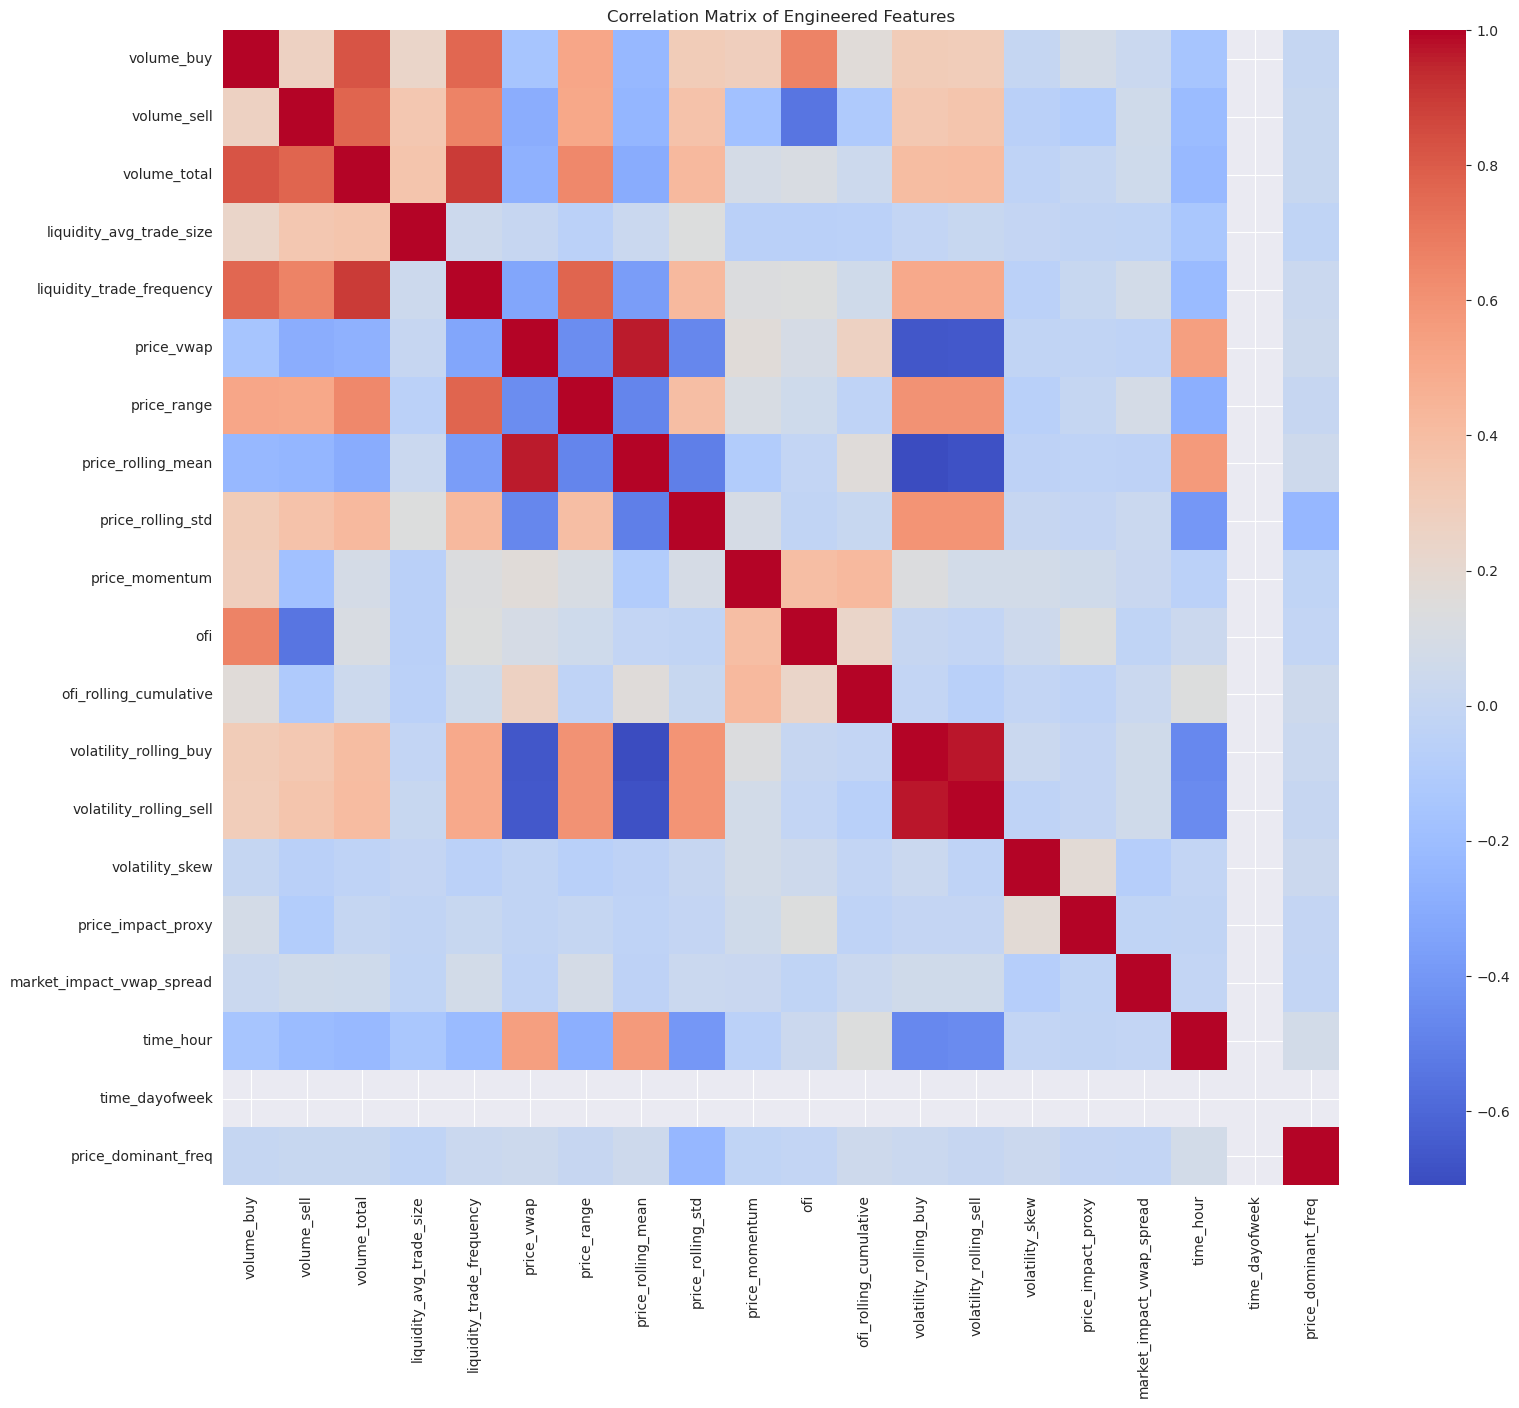

In [16]:


# --- 1. Correlation Heatmap ---
plt.figure(figsize=(18, 15))
sns.heatmap(final_features.corr(), cmap='coolwarm', annot=False) # Set annot=True if you have fewer features
plt.title('Correlation Matrix of Engineered Features')
plt.show()

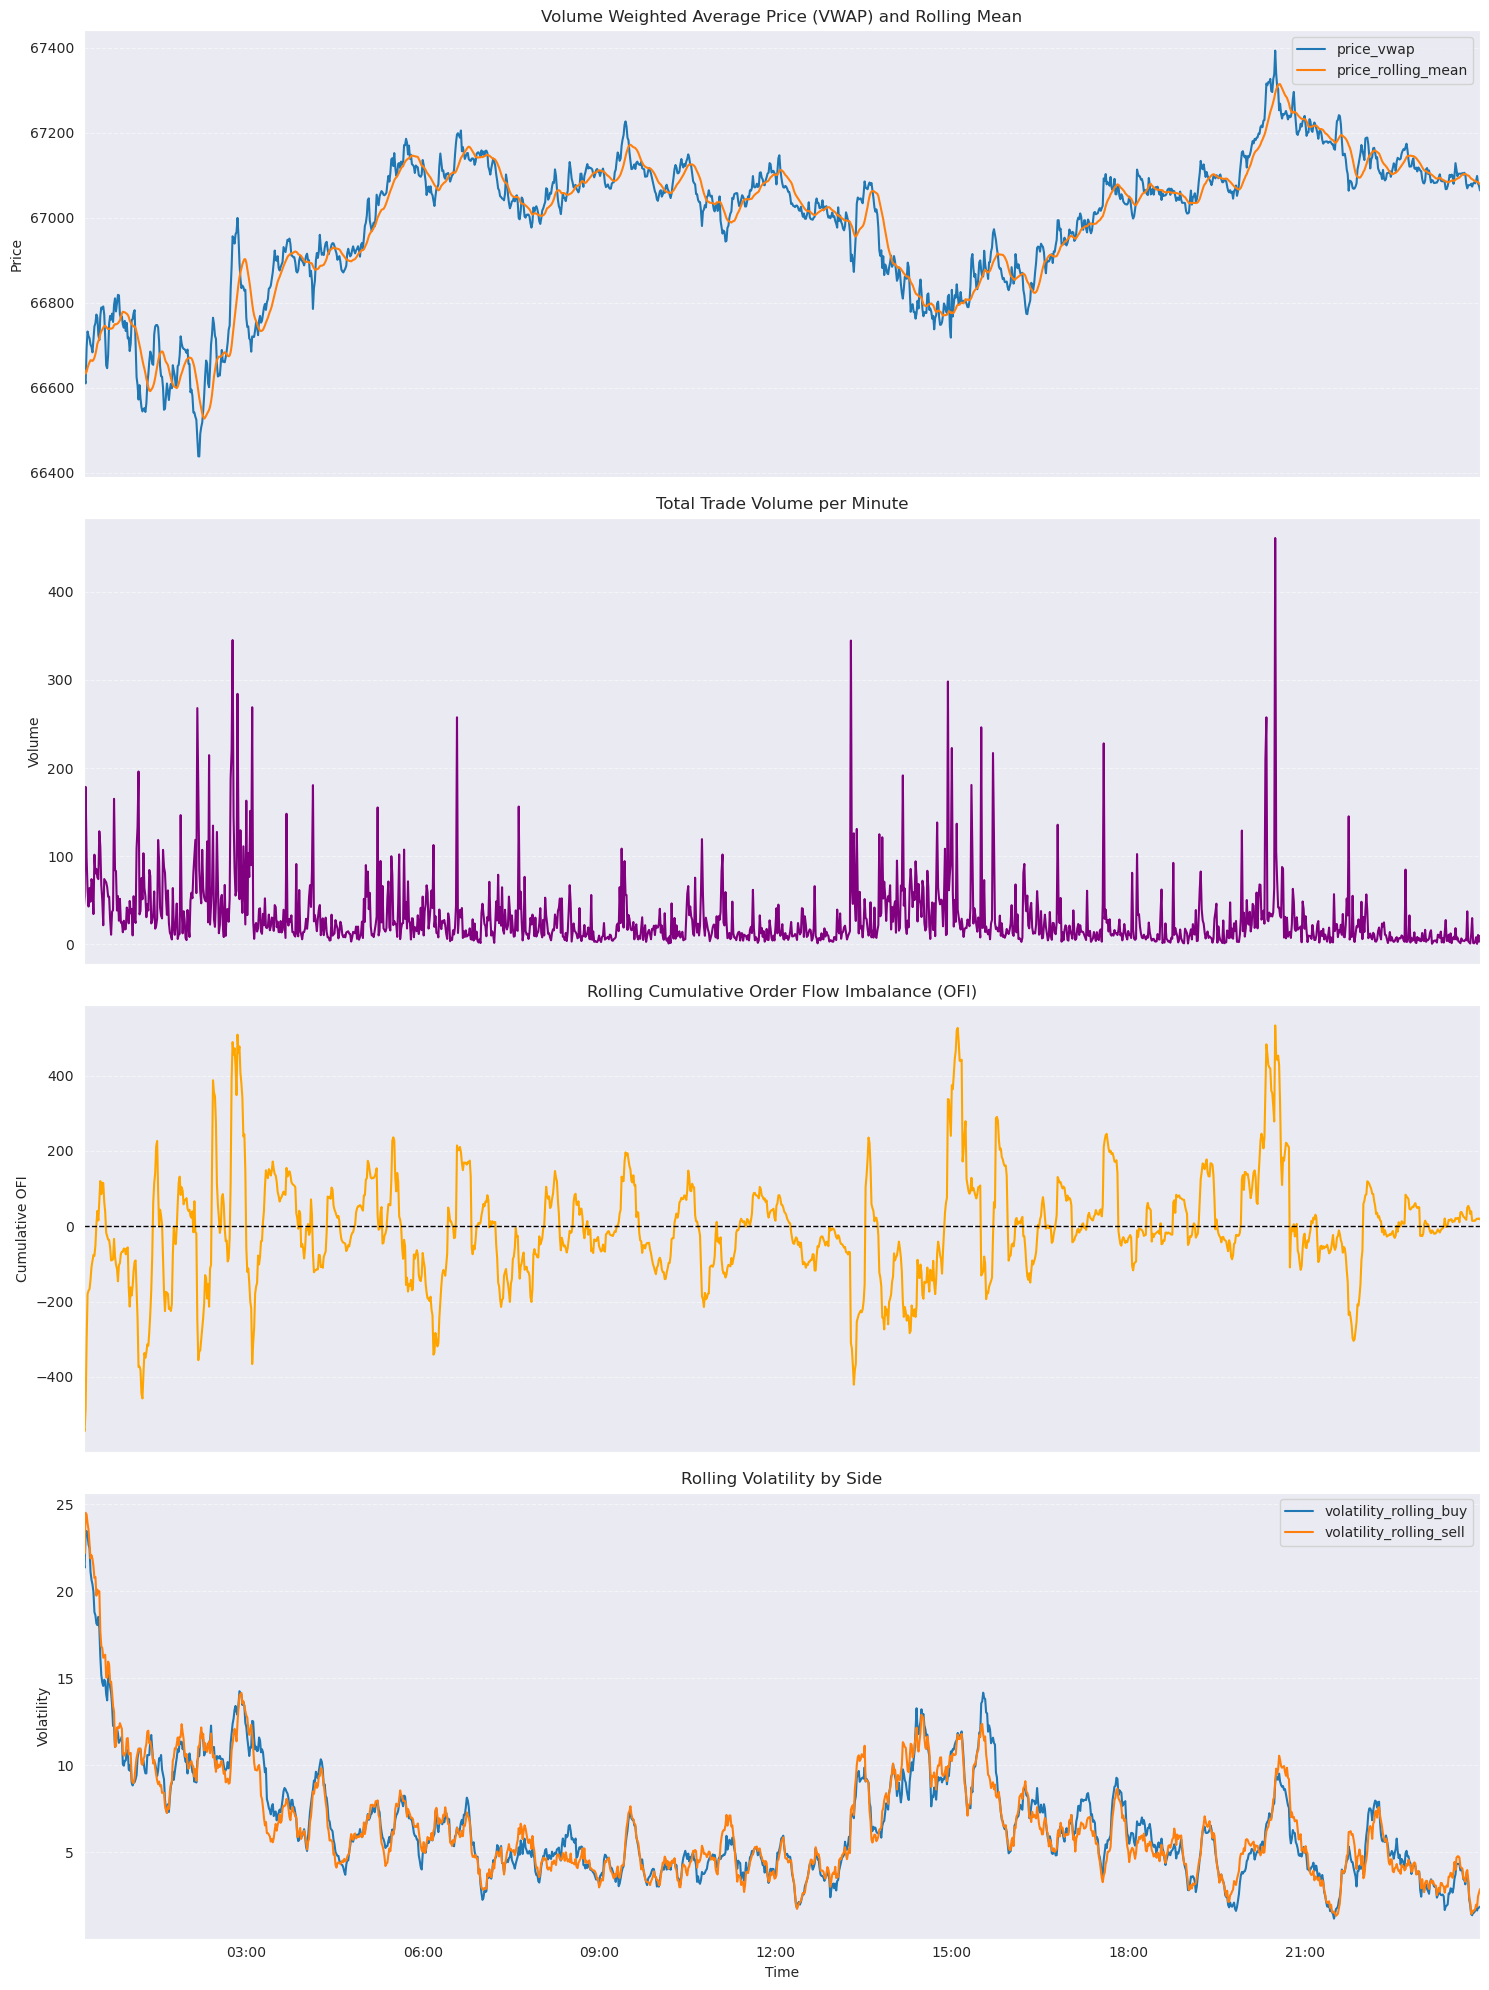

In [17]:
# --- 2. Time-Series Plots of Key Features ---
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Plot 1: VWAP and its rolling mean
final_features[['price_vwap', 'price_rolling_mean']].plot(ax=axes[0])
axes[0].set_title('Volume Weighted Average Price (VWAP) and Rolling Mean')
axes[0].set_ylabel('Price')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Total Volume
final_features['volume_total'].plot(ax=axes[1], color='purple')
axes[1].set_title('Total Trade Volume per Minute')
axes[1].set_ylabel('Volume')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Rolling Order Flow Imbalance
final_features['ofi_rolling_cumulative'].plot(ax=axes[2], color='orange')
axes[2].set_title('Rolling Cumulative Order Flow Imbalance (OFI)')
axes[2].set_ylabel('Cumulative OFI')
axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2].grid(True, linestyle='--', alpha=0.5)

# Plot 4: Rolling Volatility for Buy and Sell
final_features[['volatility_rolling_buy', 'volatility_rolling_sell']].plot(ax=axes[3])
axes[3].set_title('Rolling Volatility by Side')
axes[3].set_ylabel('Volatility')
axes[3].grid(True, linestyle='--', alpha=0.5)


plt.xlabel('Time')
plt.tight_layout()
plt.show()

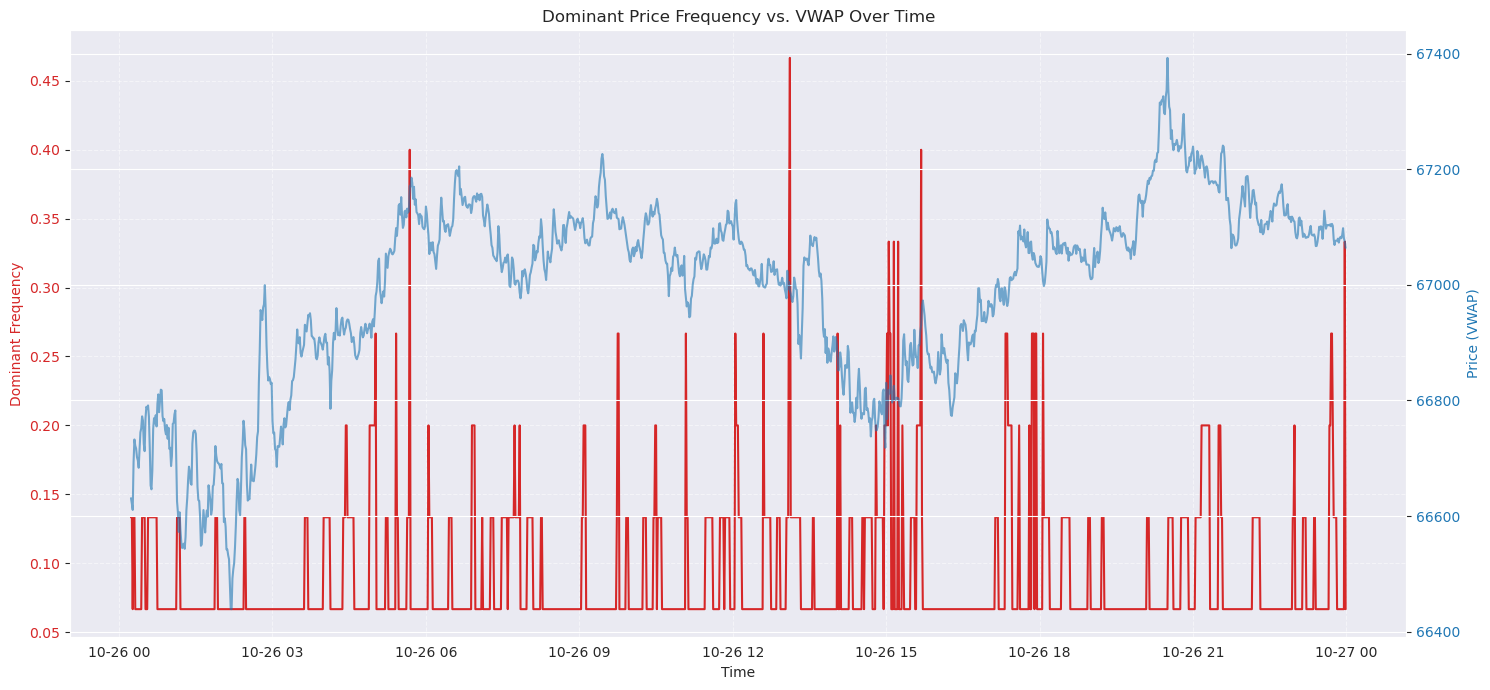

In [18]:

# --- 3. Visualize Dominant Frequency ---
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot Dominant Frequency on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Dominant Frequency', color=color)
ax1.plot(final_features.index, final_features['price_dominant_freq'], color=color, label='Dominant Frequency')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

# Create a secondary y-axis to plot the VWAP for context
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Price (VWAP)', color=color)
ax2.plot(final_features.index, final_features['price_vwap'], color=color, alpha=0.6, label='VWAP (Context)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Dominant Price Frequency vs. VWAP Over Time')
fig.tight_layout()
plt.show()